In [1]:
from sklearn import model_selection
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_data = datasets.load_svmlight_file('./data/a9a', n_features=123)
validate_data = datasets.load_svmlight_file('./data/a9a.t', n_features=123)
X_train = train_data[0].toarray()
y_train = train_data[1]
X_validate = validate_data[0].toarray()
y_validate = validate_data[1]

In [3]:
def Loss(X, y, w, b, C):
    return np.maximum(0 , 1 - y * (X.dot(w) + b)).sum() * C / X.shape[0]

In [4]:
w = np.random.normal(np.zeros(X_train.shape[1]))
# w = np.ones(X_train.shape[1])
b = np.random.normal(0)

In [5]:
Loss(X_train, y_train, w, b, 0.5)

0.4708330450598563

In [6]:
def g_w(y, x, w, b):
    if 1 - y * (x.dot(w) + b) >= 0:
        return - y * x
    else:
        return np.zeros_like(x)

def g_b(y, x, w, b):
    if 1 - y * (x.dot(w) + b) >= 0:
        return - y
    else:
        return 0

In [7]:
def SVC(X, y, w, b, alpha, C, batch_size, iters):
    n = len(y)
    loss_train = []
    loss_validate = []
    acc = []
    
    for k in range(iters):
        batch = []
        for i in range(batch_size):
            batch.append(int(np.random.randint(n)))
        X_batch = X[batch]
        y_batch = y[batch]
        tmp_w = w.copy()
        tmp_b = b
        for i in range(batch_size):
            tmp_w += C / batch_size * g_w(y_batch[i], X_batch[i], w, b)
            tmp_b += C / batch_size * g_b(y_batch[i], X_batch[i], w, b)
        w = w - alpha * tmp_w
        b = b - alpha * tmp_b
        loss_train.append(Loss(X_train, y_train, w, b, C))
        loss_validate.append(Loss(X_validate, y_validate, w, b, C))
        y_pre = X_validate.dot(w) + b
        y_pre[y_pre >= 0] = 1
        y_pre[y_pre < 0] = -1
        acc.append(np.count_nonzero(y_pre == y_validate) / y_validate.shape[0])
        if k % 50 == 0:
            print('iters:', k, 'acc:', acc[k])
    return loss_train, loss_validate, acc

In [8]:
loss_train, loss_validate, acc = SVC(X_train, y_train, w, b, 1e-2, 0.5, 128, 1000)

iters: 0 acc: 0.6682021988821325
iters: 50 acc: 0.690682390516553
iters: 100 acc: 0.7232970947730484
iters: 150 acc: 0.7546833732571709
iters: 200 acc: 0.7643879368589153
iters: 250 acc: 0.7640808304158221
iters: 300 acc: 0.7637737239727289
iters: 350 acc: 0.7637737239727289
iters: 400 acc: 0.7637737239727289
iters: 450 acc: 0.7637737239727289
iters: 500 acc: 0.7637737239727289
iters: 550 acc: 0.7637737239727289
iters: 600 acc: 0.7637737239727289
iters: 650 acc: 0.7637737239727289
iters: 700 acc: 0.7637737239727289
iters: 750 acc: 0.7637737239727289
iters: 800 acc: 0.7637737239727289
iters: 850 acc: 0.7637737239727289
iters: 900 acc: 0.7637737239727289
iters: 950 acc: 0.7637737239727289


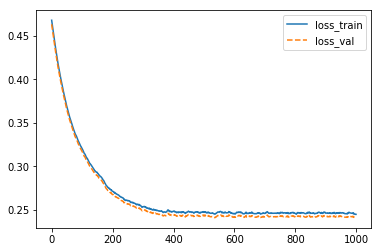

In [9]:
plt.plot(loss_train, label = 'loss_train')
plt.plot(loss_validate, label = 'loss_val', ls = '--')
plt.legend(loc='upper right')
plt.savefig('./tex/lab2/MSGD_svm.pdf')

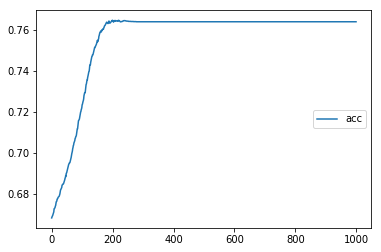

In [13]:
plt.plot(acc, label = 'acc')
plt.legend(loc='center right')
plt.savefig('./tex/lab2/acc_svm.pdf')